In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
data = pd.read_csv('data/string_MCL_clusters.tsv', sep='\t')

In [5]:
data.columns

Index(['#clustering method', 'cluster number', 'cluster color', 'gene count',
       'protein name', 'protein identifier', 'protein description'],
      dtype='object')

In [7]:
cluster_1 = data['cluster number']==1
cluster_2 = data['cluster number']==2


In [9]:
data[cluster_1].to_csv('data/cluster_1.csv')

In [10]:
data[cluster_2].to_csv('data/cluster_2.csv')

In [27]:
#Load in the data and clean the percentages
cluster_1 = pd.read_csv('data/panther_cluster_bio_1.txt', names=['index', 'Process', 'count', 'weird', 'percent'], sep='\t')
cluster_2 = pd.read_csv('data/panther_cluster_bio_2.txt', names=['index', 'Process', 'count', 'weird', 'percent'], sep='\t')
for i in [cluster_1,cluster_2]:
    i['percent'] = i['percent'].str.rstrip('%').astype('float')

In [28]:
cluster_1['Process']

0     cellular component organization or biogenesis ...
1                         cellular process (GO:0009987)
2                   multi-organism process (GO:0051704)
3                             localization (GO:0051179)
4                    biological regulation (GO:0065007)
5                     response to stimulus (GO:0050896)
6                                 behavior (GO:0007610)
7                                signaling (GO:0023052)
8                    developmental process (GO:0032502)
9         multicellular organismal process (GO:0032501)
10                     biological adhesion (GO:0022610)
11                       metabolic process (GO:0008152)
12                                  growth (GO:0040007)
Name: Process, dtype: object

In [29]:
cluster_2

,index,Process,count,weird,percent
0,1,cellular component organization or biogenesis ...,9,20.5%,6.5
1,2,cellular process (GO:0009987),25,56.8%,18.1
2,3,multi-organism process (GO:0051704),2,4.5%,1.4
3,4,localization (GO:0051179),15,34.1%,10.9
4,5,biological regulation (GO:0065007),20,45.5%,14.5
5,6,response to stimulus (GO:0050896),10,22.7%,7.2
6,7,behavior (GO:0007610),2,4.5%,1.4
7,8,signaling (GO:0023052),21,47.7%,15.2
8,9,developmental process (GO:0032502),11,25.0%,8.0
9,10,multicellular organismal process (GO:0032501),14,31.8%,10.1


<ipython-input-31-5eadeb4f905f>:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


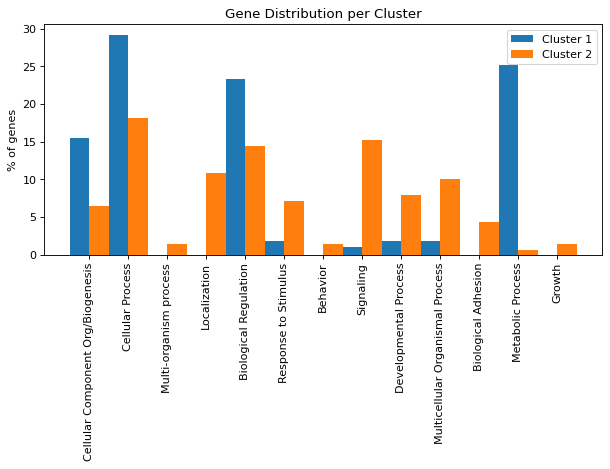

In [31]:
labels = ['Cellular Component Org/Biogenesis','Cellular Process','Multi-organism process','Localization','Biological Regulation',
         'Response to Stimulus','Behavior','Signaling','Developmental Process','Multicellular Organismal Process',
         'Biological Adhesion','Metabolic Process','Growth',]


c1_counts = cluster_1['percent'] 
c2_counts = cluster_2['percent']

fig = plt.figure(num=None, figsize=(9, 6), dpi=80, facecolor='w', edgecolor='k')

x = np.arange(len(labels))# the label locations
width = 0.5  # the width of the bars

rects1 = plt.bar(x - width/2, c1_counts, width, label='Cluster 1')
rects2 = plt.bar(x + width/2, c2_counts, width, label='Cluster 2')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('% of genes')
plt.title('Gene Distribution per Cluster')
plt.xticks(x, labels, rotation=90)
plt.legend()
# plt.margins(0.3)
fig.subplots_adjust(bottom=0.4)

fig.show()
fig.savefig('imgs/3_2.pdf')